# 株価の予測

1. データの収集
2. データの前処理
3. 学習データとテストデータの作成
4. 学習
5. 評価
6. 予測

# 1. データの収集

In [2]:
import pandas as pd
df = pd.read_csv('kabuka.csv')

In [3]:
df.head(3)

,day,value
0,2017/1/4,7097
1,2017/1/5,7049
2,2017/1/6,6930


In [4]:
df.tail(3)

,day,value
160,2017/8/25,6158
161,2017/8/28,6126
162,2017/8/29,6090


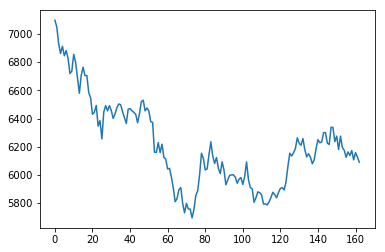

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.plot(np.arange(len(df['day'])), df['value'])

# 2. データの前処理

In [10]:
data = df['value'].values
print(data)

[7097 7049 6930 6861 6912 6845 6882 6827 6719 6736 6855 6801 6690 6579 6706
 6764 6704 6705 6584 6546 6430 6445 6493 6346 6385 6255 6446 6491 6454 6491
 6457 6400 6432 6478 6503 6498 6448 6406 6365 6466 6470 6455 6444 6430 6370
 6434 6520 6530 6454 6475 6453 6377 6373 6161 6160 6229 6158 6218 6124 6111
 6042 6046 5984 5909 5810 5832 5896 5910 5798 5731 5798 5759 5757 5695 5754
 5855 5887 6000 6154 6117 6035 6042 6143 6235 6135 6081 6123 6047 6009 6093
 6034 5930 5965 5997 6000 6001 5985 5941 5970 5981 5932 5989 6092 5968 5910
 5902 5806 5838 5880 5874 5859 5794 5794 5787 5809 5840 5877 5860 5838 5876
 5904 5910 5893 5950 6060 6154 6134 6157 6187 6263 6225 6210 6258 6180 6128
 6150 6126 6079 6107 6186 6250 6228 6234 6300 6300 6225 6216 6339 6336 6236
 6275 6180 6275 6194 6175 6125 6163 6138 6173 6107 6158 6126 6090]


In [11]:
div = int(len(data) * 0.8)
train_data = data[:div]
test_data = data[div:]
print('train_data:\n', train_data)
print('test_data:\n', test_data)

train_data:
 [7097 7049 6930 6861 6912 6845 6882 6827 6719 6736 6855 6801 6690 6579 6706
 6764 6704 6705 6584 6546 6430 6445 6493 6346 6385 6255 6446 6491 6454 6491
 6457 6400 6432 6478 6503 6498 6448 6406 6365 6466 6470 6455 6444 6430 6370
 6434 6520 6530 6454 6475 6453 6377 6373 6161 6160 6229 6158 6218 6124 6111
 6042 6046 5984 5909 5810 5832 5896 5910 5798 5731 5798 5759 5757 5695 5754
 5855 5887 6000 6154 6117 6035 6042 6143 6235 6135 6081 6123 6047 6009 6093
 6034 5930 5965 5997 6000 6001 5985 5941 5970 5981 5932 5989 6092 5968 5910
 5902 5806 5838 5880 5874 5859 5794 5794 5787 5809 5840 5877 5860 5838 5876
 5904 5910 5893 5950 6060 6154 6134 6157 6187 6263]
test_data:
 [6225 6210 6258 6180 6128 6150 6126 6079 6107 6186 6250 6228 6234 6300 6300
 6225 6216 6339 6336 6236 6275 6180 6275 6194 6175 6125 6163 6138 6173 6107
 6158 6126 6090]


# 3. 学習データとテストデータの作成

In [12]:
train_X = []
train_y = []
for i in range(len(train_data)-1):
    train_X.append(train_data[i])
    if train_data[i] < train_data[i+1]:
        train_y.append(1)
    else:
        train_y.append(-1)

In [13]:
test_X = []
test_y = []
for j in range(len(test_data)-1):
    test_X.append(test_data[j])
    if test_data[j] < test_data[j+1]:
        test_y.append(1)
    else:
        test_y.append(-1)

In [31]:
import numpy as np
train_X = np.array(train_X)
test_X = np.array(test_X)
print('len(train_X):', len(train_X))
print('len(test_X):', len(test_X))
print('len(train_y):', len(train_y))
print('len(test_y):', len(test_y))
print('train_X:\n', train_X)
print('train_y:\n', train_y)
print('test_X:\n', test_X)
print('test_y:\n', test_y)

len(train_X): 129
len(test_X): 32
len(train_y): 129
len(test_y): 32
train_X:
 [7097 7049 6930 6861 6912 6845 6882 6827 6719 6736 6855 6801 6690 6579 6706
 6764 6704 6705 6584 6546 6430 6445 6493 6346 6385 6255 6446 6491 6454 6491
 6457 6400 6432 6478 6503 6498 6448 6406 6365 6466 6470 6455 6444 6430 6370
 6434 6520 6530 6454 6475 6453 6377 6373 6161 6160 6229 6158 6218 6124 6111
 6042 6046 5984 5909 5810 5832 5896 5910 5798 5731 5798 5759 5757 5695 5754
 5855 5887 6000 6154 6117 6035 6042 6143 6235 6135 6081 6123 6047 6009 6093
 6034 5930 5965 5997 6000 6001 5985 5941 5970 5981 5932 5989 6092 5968 5910
 5902 5806 5838 5880 5874 5859 5794 5794 5787 5809 5840 5877 5860 5838 5876
 5904 5910 5893 5950 6060 6154 6134 6157 6187]
train_y:
 [-1 -1 -1  1 -1  1 -1 -1  1  1 -1 -1 -1  1  1 -1  1 -1 -1 -1  1  1 -1  1 -1
  1  1 -1  1 -1 -1  1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1 -1  1 -1
 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1  1  1  1 -1 -1  1 -1 -1 -1  1  1
  1  1  1 -1 -1  1  1  1 -1 -

# 4. 学習
## RandomForest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
forest = RandomForestClassifier(n_estimators=len(train_X), random_state=0)
forest.fit(train_X.reshape(-1, 1), train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=129, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [32]:
train_pred = forest.predict(train_X.reshape(-1, 1))
print('train_pred:\n', train_pred)
test_pred = forest.predict(test_X.reshape(-1, 1))
print('test_pred:\n', test_pred)

train_pred:
 [-1 -1 -1  1 -1  1 -1 -1  1  1 -1 -1 -1  1  1 -1  1 -1 -1 -1  1  1 -1  1 -1
  1  1 -1  1 -1 -1  1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1 -1  1 -1
 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1  1  1  1 -1 -1  1 -1 -1 -1  1  1
  1  1  1 -1 -1  1  1  1 -1 -1  1 -1 -1  1 -1 -1  1  1  1  1 -1 -1  1  1 -1
  1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1  1 -1  1  1  1
 -1  1  1  1]
test_pred:
 [-1 -1  1  1 -1 -1 -1  1 -1  1  1 -1 -1  1  1 -1 -1  1  1 -1  1  1  1  1  1
 -1 -1 -1 -1 -1  1 -1]


# 5. 評価

In [35]:
print('train score:', forest.score(train_X.reshape(-1, 1), train_y))
print('test score:', forest.score(test_X.reshape(-1, 1), test_y))

train score: 0.992248062016
test score: 0.3125


# 6. 予測

In [36]:
print('predict:', forest.predict(data[-1]))

predict: [-1]
